In [25]:
import pandas as pd, numpy as np, os, matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error as mse
from cwd import getPath

#the getPath function from the CWD file just gets the current path. Jupyter has issues with doing it here, but the external CWD file solves it. I can then use the path to change directory.
os.chdir(getPath())

#Get base data
car_data = pd.read_csv("car_data.csv")
car_weight = car_data["weight"]
hwy_mpg = car_data["hwy_mpg"]

#Staging data from pre-processing
car_weight_processed = np.array(car_weight).reshape(-1,1)
car_weight_train = car_weight_processed[0::2]
car_weight_test = car_weight_processed[1::2]
hwy_mpg_train = hwy_mpg[0::2]
hwy_mpg_test = hwy_mpg[1::2]

#Create LR object
lr_model = linear_model.LinearRegression()

#Train model
lr_model.fit(car_weight_train,hwy_mpg_train)

#predict
hwy_mpg_pred = lr_model.predict(car_weight_test)

#get RMSE
model_rmse = mse(hwy_mpg_test, hwy_mpg_pred, squared=False)

#get coeffecient and intercept
model_slope, model_intercept  = lr_model.coef_, lr_model.intercept_

#Set plot style
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('seaborn-v0_8-dark')


Text(0.5, 1.0, 'Weight vs MPG')

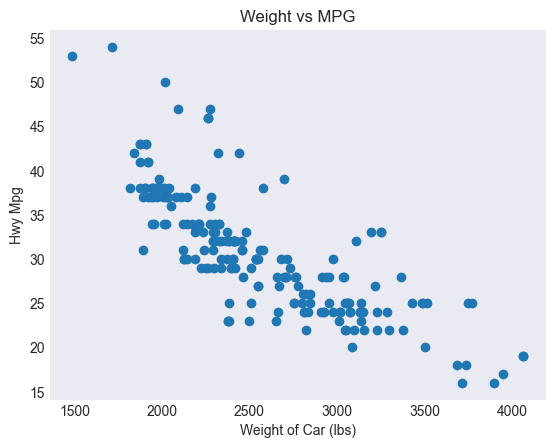

In [12]:
# 1)
plt.scatter(car_weight,hwy_mpg)
plt.xlabel("Weight of Car (lbs)")
plt.ylabel("Hwy Mpg")
plt.title("Weight vs MPG")


2) Based upon what the plot shows, there is a negative corrolation with the weight of a car to its highway mileage. 

3) If I were to build a model to predict the mileage from the weight, I would expect a negative slope. This is because the bulk of the data shows a negative correlation between the two. I would expect this correlation to be more pronounced and reinforced with additional context (diesel vs gas, or SUV vs Sedan for example)

4) If a slope of a linear model was -0.05, that means that there is a slight negative corrolation. It means, that vehicle weights that are reasonably close will have pretty much the same (or comprable) MPG, but that over the MPG will decrease from weight significantly. 


The RSME of my function is approximately 13.901. The RSME of the calculated best fit is approximately 3.719
If a car weights 3200lbs then it's MPG will be approximately 24.28


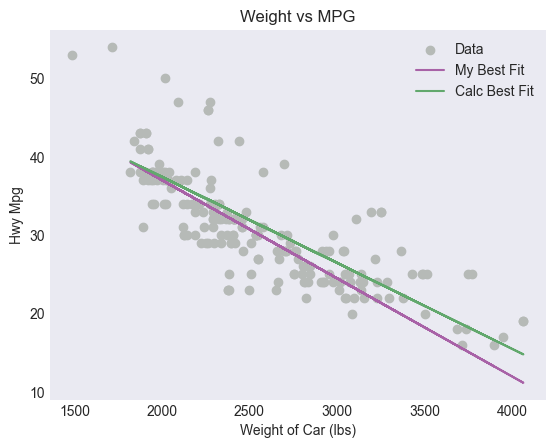

In [24]:
my_best_fit = -0.0125*car_weight_test+62
plt.scatter(car_weight,hwy_mpg,c="#b6bab7", label="Data")
plt.xlabel("Weight of Car (lbs)")
plt.ylabel("Hwy Mpg")
plt.title("Weight vs MPG")
plt.plot(car_weight_test,my_best_fit, c="#a862a7", label="My Best Fit") #5)
plt.plot(car_weight_test,hwy_mpg_pred, c="#62a86d", label="Calc Best Fit") #6)
plt.legend()
my_rsme = mse(hwy_mpg_test, my_best_fit)
print(f'The RSME of my function is approximately {my_rsme:.3f}. The RSME of the calculated best fit is approximately {model_rmse:.3f}') #7. Also shown in markdown below
print(f'If a car weights 3200lbs then it\'s MPG will be approximately {float(model_slope*3200+model_intercept):.2f}') #8. Also shown in markdown below

5) (Mine) Slope of -0.015 and Y-intercept of 62.

6) (Model) Slope of ~-0.01095 and Y-intercept of ~59.31735

7) The function had an RMSE of approximately 3.719 whereas my function had an RMSE of 13.901. This means that, on average, the function was over 3.7x more accurate than my best guess.

8) If a car weights 3200lbs then it's MPG will be approximately 24.28